In [155]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Task 2

Load data from CSV files

In [156]:
stations = pd.read_csv('stations.csv')
stations2 = pd.read_csv('Station dataset.csv')
connections = pd.read_csv('lines2.csv')
routes = pd.read_csv('routes.csv')

In [157]:
routes

,line,name,colour,stripe
0,1,Bakerloo Line,AE6017,NaN
1,3,Circle Line,FFE02B,NaN
2,6,Hammersmith & City Line,F491A8,NaN
3,7,Jubilee Line,949699,NaN
4,11,Victoria Line,0A9CDA,NaN
5,2,Central Line,F15B2E,NaN
6,4,District Line,00A166,NaN
7,5,East London Line,FBAE34,NaN
8,8,Metropolitan Line,91005A,NaN
9,9,Northern Line,000000,NaN


In [158]:
connections

,station1,station2,line,time
0,11,163,1,1
1,11,212,1,2
2,49,87,1,1
3,49,197,1,2
4,82,163,1,2
...,...,...,...,...
401,198,272,11,1
402,198,273,11,3
403,224,260,11,3
404,245,272,11,3


In [159]:
stations2

,ID,Line,Station
0,1,Piccadilly,Hyde Park Corner
1,2,Piccadilly,Green Park
2,3,Piccadilly,Piccadilly Circus
3,4,Piccadilly,Leicester Square
4,5,Piccadilly,Covent Garden
5,6,Piccadilly,Holborn
6,7,Piccadilly,Russell Square
7,8,Bakerloo,Marylebone
8,9,Bakerloo,Regent's Park
9,10,Bakerloo,Oxford Circus


* Piccadilly_line

In [160]:
piccadilly_from = stations2['Station'][0:6]
piccadilly_from_df = pd.DataFrame({'From Station': piccadilly_from})

piccadilly_to = stations2['Station'][1:7]
piccadilly_to_df = pd.DataFrame({'To Station': piccadilly_to}).reset_index()

piccadilly_line = pd.concat([piccadilly_from_df, piccadilly_to_df], axis=1,)
piccadilly_line = piccadilly_line.loc[:,['From Station', 'To Station']]
piccadilly_line


,From Station,To Station
0,Hyde Park Corner,Green Park
1,Green Park,Piccadilly Circus
2,Piccadilly Circus,Leicester Square
3,Leicester Square,Covent Garden
4,Covent Garden,Holborn
5,Holborn,Russell Square


* Bakerloo Line

In [161]:
bakerloo_from = stations2['Station'][7:12]
bakerloo_from_df = pd.DataFrame({'From Station': bakerloo_from}).reset_index()

bakerloo_to = stations2['Station'][8:13]
bakerloo_to_df = pd.DataFrame({'To Station': bakerloo_to}).reset_index()

bakerloo_line = pd.concat([bakerloo_from_df, bakerloo_to_df], axis=1,)
bakerloo_line = bakerloo_line.loc[:,['From Station', 'To Station']]
bakerloo_line

,From Station,To Station
0,Marylebone,Regent's Park
1,Regent's Park,Oxford Circus
2,Oxford Circus,Piccadilly Circus
3,Piccadilly Circus,Charing Cross
4,Charing Cross,Lambeth North


* Central Line

In [162]:
central_from = stations2['Station'][13:19]
central_from_df = pd.DataFrame({'From Station': central_from}).reset_index()

central_to = stations2['Station'][14:20]
central_to_df = pd.DataFrame({'To Station': central_to}).reset_index()

central_line = pd.concat([central_from_df, central_to_df], axis=1,)
central_line = central_line.loc[:,['From Station', 'To Station']]
central_line

,From Station,To Station
0,Lancaster Gate,Marble Arch
1,Marble Arch,Bond Street
2,Bond Street,Oxford Circus
3,Oxford Circus,Tottenham Court Road
4,Tottenham Court Road,Holborn
5,Holborn,Chancery Lane


* Northern Line

In [163]:
northern_from = stations2['Station'][20:25]
northern_from_df = pd.DataFrame({'From Station': northern_from}).reset_index()

northern_to = stations2['Station'][21:]
northern_to_df = pd.DataFrame({'To Station': northern_to}).reset_index()

northern_line = pd.concat([northern_from_df, northern_to_df], axis=1,)
northern_line = northern_line.loc[:,['From Station', 'To Station']]
northern_line

,From Station,To Station
0,Warren Street,Goodge Street
1,Goodge Street,Tottenham Court Road
2,Tottenham Court Road,Leicester Square
3,Leicester Square,Charing Cross
4,Charing Cross,Waterloo


In [164]:
result = pd.merge(stations2, stations, left_on='Station', right_on='name', how='left')
result

,ID,Line,Station,id,latitude,longitude,name,display_name,zone,total_lines,rail
0,1,Piccadilly,Hyde Park Corner,133.0,51.5027,-0.1527,Hyde Park Corner,Hyde<br />Park<br />Corner,1.0,1.0,0.0
1,2,Piccadilly,Green Park,107.0,51.5067,-0.1428,Green Park,Green<br />Park,1.0,3.0,0.0
2,3,Piccadilly,Piccadilly Circus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Piccadilly,Leicester Square,151.0,51.5113,-0.1281,Leicester Square,Leicester<br />Square,1.0,2.0,0.0
4,5,Piccadilly,Covent Garden,60.0,51.5129,-0.1243,Covent Garden,Covent<br />Garden,1.0,1.0,0.0
5,6,Piccadilly,Holborn,126.0,51.5174,-0.1200,Holborn,NaN,1.0,2.0,0.0
6,7,Piccadilly,Russell Square,223.0,51.5230,-0.1244,Russell Square,Russell<br />Square,1.0,1.0,0.0
7,8,Bakerloo,Marylebone,163.0,51.5225,-0.1631,Marylebone,NaN,1.0,1.0,1.0
8,9,Bakerloo,Regent's Park,212.0,51.5234,-0.1466,Regent's Park,Regent's<br />Park,1.0,1.0,0.0
9,10,Bakerloo,Oxford Circus,192.0,51.5150,-0.1415,Oxford Circus,Oxford<br />Circus,1.0,3.0,0.0


In [165]:
result.isnull().sum()

ID              0
Line            0
Station         0
id              2
latitude        2
longitude       2
name            2
display_name    6
zone            2
total_lines     2
rail            2
dtype: int64

In [166]:
result.loc[result['Station'] == "Piccadilly Circus", 'latitude'] = 51.5099
result.loc[result['Station'] == "Piccadilly Circus", 'longitude'] = -0.1343


In [167]:
# final_result = result.loc[result['ID','Line','Station','latitude','longitude' ]]
final_result = result.loc[:, ['ID', 'Line', 'Station', 'latitude', 'longitude']]
final_result


,ID,Line,Station,latitude,longitude
0,1,Piccadilly,Hyde Park Corner,51.5027,-0.1527
1,2,Piccadilly,Green Park,51.5067,-0.1428
2,3,Piccadilly,Piccadilly Circus,51.5099,-0.1343
3,4,Piccadilly,Leicester Square,51.5113,-0.1281
4,5,Piccadilly,Covent Garden,51.5129,-0.1243
5,6,Piccadilly,Holborn,51.5174,-0.1200
6,7,Piccadilly,Russell Square,51.5230,-0.1244
7,8,Bakerloo,Marylebone,51.5225,-0.1631
8,9,Bakerloo,Regent's Park,51.5234,-0.1466
9,10,Bakerloo,Oxford Circus,51.5150,-0.1415


In [168]:
# Function to break long station names into multiple lines
def break_long_string(label, max_words=2):
    """Breaks a string into multiple lines if it contains more than max_words."""
    words = label.split()
    if len(words) >= max_words:
        return '\n'.join(words)  # Join words with newline character
    return label

Step 1: Initialize a Graph and Add Edges

In [169]:
G = nx.DiGraph()

# Add nodes to the graph with positions
for _, row in final_result.iterrows():
    G.add_node(row["Station"], pos=(row["longitude"], row["latitude"]))

# Define colors for each line
line_colors = {
    'Piccadilly': 'blue',
    'Bakerloo': 'brown',
    'Central': 'red',
    'Northern': 'black'
}

# Add edges to the graph with color mapping
for df, line_name in zip([piccadilly_line, bakerloo_line, central_line, northern_line], line_colors.keys()):
    color = line_colors[line_name]
    for _, row in df.iterrows():
        G.add_edge(row['From Station'], row['To Station'], color=color)


Step 2: Plot the Graph on a Map

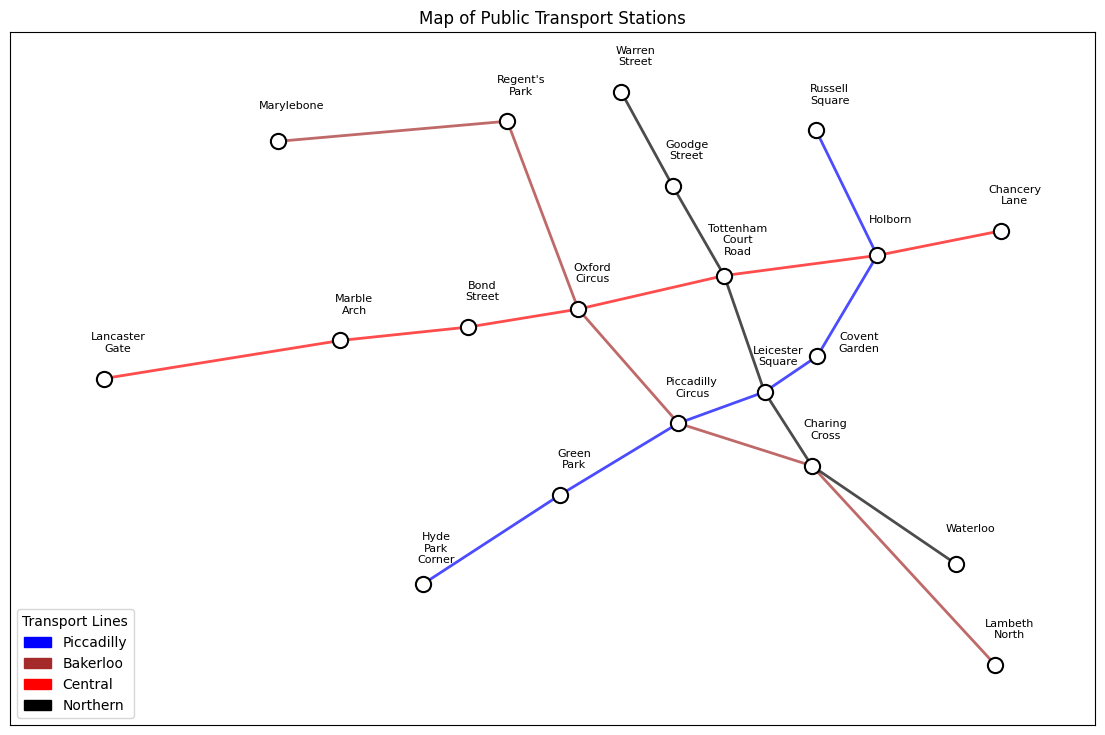

In [170]:
fig, ax = plt.subplots(figsize=(14, 9))

# Convert positions to map projection coordinates
pos = {station: (lon, lat) for station, (lon, lat) in nx.get_node_attributes(G, 'pos').items()}

# Offset positions for labels to avoid overlapping with nodes
label_pos = {station: (lon + 0.001, lat + 0.0016) for station, (lon, lat) in pos.items()}

# Adjust the label position of a specific node by name
specific_node = "Covent Garden" 
if specific_node in label_pos:
    label_pos[specific_node] = (label_pos[specific_node][0] + 0.002, label_pos[specific_node][1] - 0.001)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=120, node_color="white", ax=ax, edgecolors="black", linewidths=1.5)

# Draw edges with assigned colors
edges = G.edges(data=True)
colors = [edge[2]['color'] for edge in edges]  # Get colors for each edge
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, ax=ax, arrows=False, edge_color=colors)

# Prepare labels with line breaks using the correct function
label_dict = {station: break_long_string(station, max_words=2) for station in G.nodes()}

# Draw labels with adjusted positions
nx.draw_networkx_labels(G, label_pos, labels=label_dict, font_size=8, font_color="black", ax=ax)

# Add a legend for each line
legend_patches = [mpatches.Patch(color=color, label=line_name) for line_name, color in line_colors.items()]
ax.legend(handles=legend_patches, title="Transport Lines", loc="lower left")

plt.title("Map of Public Transport Stations")
plt.margins(0.05)

In [171]:
# Haversine function to calculate distance between two latitude-longitude pairs
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Earth's radius in kilometers
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])  # Convert to radians

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c  # Distance in kilometers

# Step 1: Initialize the Graph and Add Nodes with Positions
G = nx.DiGraph()

# Add nodes to the graph with positions
for _, row in final_result.iterrows():
    G.add_node(row["Station"], pos=(row["longitude"], row["latitude"]))

# Define colors for each line
line_colors = {
    'Piccadilly': 'blue',
    'Bakerloo': 'brown',
    'Central': 'red',
    'Northern': 'black'
}

# Step 2: Add edges to the graph with distances computed via Haversine function
for df, line_name in zip([piccadilly_line, bakerloo_line, central_line, northern_line], line_colors.keys()):
    color = line_colors[line_name]
    for _, row in df.iterrows():
        from_station = row['From Station']
        to_station = row['To Station']
        
        # Get the positions for each station
        lon1, lat1 = G.nodes[from_station]['pos']
        lon2, lat2 = G.nodes[to_station]['pos']
        
        # Calculate distance between the two stations
        distance = haversine(lon1, lat1, lon2, lat2)
        
        # Add edge with color and distance
        G.add_edge(from_station, to_station, color=color, distance=distance)

# Step 3: Extract distances and calculate total length, average, and standard deviation
distances = [data['distance'] for _, _, data in G.edges(data=True)]

total_length = sum(distances)
average_distance = np.mean(distances)
std_dev_distance = np.std(distances)

# Display results
print(f"Total length of the transport network: {total_length:.2f} km")
print(f"Average distance between stations: {average_distance:.2f} km")
print(f"Standard deviation of distances between stations: {std_dev_distance:.2f} km")


NameError: name 'radians' is not defined

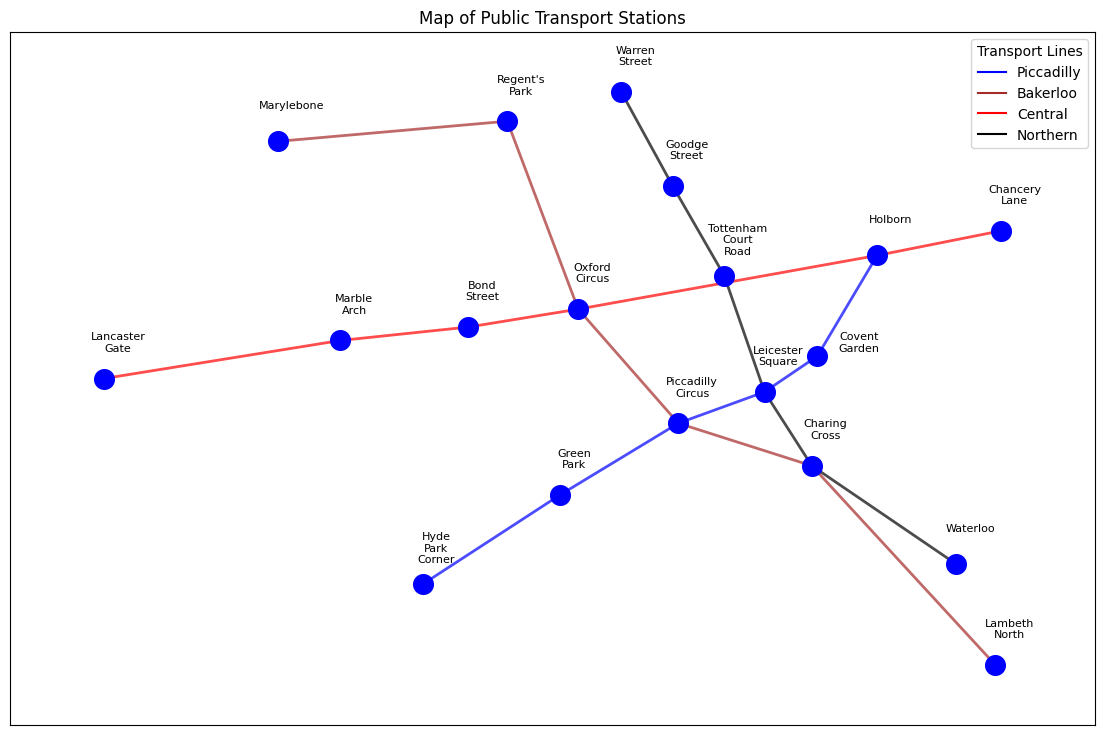

NameError: name 'stats' is not defined

In [ ]:
# Function to break long station names into multiple lines
def break_long_string(label, max_words=2):
    """Breaks a string into multiple lines if it contains more than max_words."""
    words = label.split()
    if len(words) >= max_words:
        return '\n'.join(words)
    return label

# Function to calculate Haversine distance
def haversine(coord1, coord2):
    """Calculate the Haversine distance between two latitude/longitude points."""
    R = 6371  # Earth radius in kilometers
    lat1, lon1 = radians(coord1[1]), radians(coord1[0])
    lat2, lon2 = radians(coord2[1]), radians(coord2[0])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# Step 1: Initialize a Graph and Add Edges
G = nx.DiGraph()

# Add nodes to the graph with positions
for _, row in final_result.iterrows():
    G.add_node(row["Station"], pos=(row["longitude"], row["latitude"]))

# Define colors for each line
line_colors = {
    'Piccadilly': 'blue',
    'Bakerloo': 'brown',
    'Central': 'red',
    'Northern': 'black'
}

# Add edges to the graph with color mapping
for df, line_name in zip([piccadilly_line, bakerloo_line, central_line, northern_line], line_colors.keys()):
    color = line_colors[line_name]
    for _, row in df.iterrows():
        G.add_edge(row['From Station'], row['To Station'], color=color)

# Step 2: Calculate distances between stations
distances = []
for u, v in G.edges():
    pos_u = G.nodes[u]['pos']
    pos_v = G.nodes[v]['pos']
    distance = haversine(pos_u, pos_v)
    distances.append(distance)

# Step 3: Plot the Graph on a Map
fig, ax = plt.subplots(figsize=(14, 9))
pos = {station: (lon, lat) for station, (lon, lat) in nx.get_node_attributes(G, 'pos').items()}
label_pos = {station: (lon + 0.001, lat + 0.0016) for station, (lon, lat) in pos.items()}

# Adjust the label position of a specific node by name
specific_node = "Covent Garden"
if specific_node in label_pos:
    label_pos[specific_node] = (label_pos[specific_node][0] + 0.002, label_pos[specific_node][1] - 0.001)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=200, node_color="blue", ax=ax)
edges = G.edges(data=True)
colors = [edge[2]['color'] for edge in edges]
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, ax=ax, arrows=False, edge_color=colors)

# Prepare labels with line breaks
label_dict = {station: break_long_string(station, max_words=2) for station in G.nodes()}
nx.draw_networkx_labels(G, label_pos, labels=label_dict, font_size=8, font_color="black", ax=ax)

# Step 4: Add a legend for each line
for line, color in line_colors.items():
    ax.plot([], [], color=color, label=line)
ax.legend(title="Transport Lines")

plt.title("Map of Public Transport Stations")
plt.margins(0.05)
plt.show()

# Step 5: Visualize distances with mean, median, and mode
mean_distance = np.mean(distances)
median_distance = np.median(distances)
mode_distance = stats.mode(distances)[0][0]

plt.figure(figsize=(10, 6))
plt.hist(distances, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_distance, color='blue', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_distance:.2f} km')
plt.axvline(median_distance, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median_distance:.2f} km')
plt.axvline(mode_distance, color='red', linestyle='dashed', linewidth=1.5, label=f'Mode: {mode_distance:.2f} km')

# Labels and legend
plt.xlabel("Distance between Stations (km)")
plt.ylabel("Frequency")
plt.title("Distribution of Distances Between Stations with Mean, Median, and Mode")
plt.legend()
plt.show()
